# Ridge Regression

In [25]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
## Load the training data into feature matrix, class labels, and event ids:

In [27]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Features Preparation
 * Standardization
 * PCA ( TODO )
 * Polynomial basis

In [40]:
from helpers import *
# Standardization
tX_norm = normalize(tX)

# Polynomial Basis
degree = 2
print("normal", tX.shape)
tX_poly = polynomialBasis(tX_norm, degree)
tX_basis = tX_poly
print("basis", tX_basis.shape)


normal (250000, 30)
basis (250000, 60)


## Parameter Optimization

In [41]:
from cross_validation import *

k_fold = 2
nbPoints = 30
lambdas = np.logspace(-4, 0, nbPoints)
losses_tr = []
losses_te = []

#print("Gammas: {}".format(gammas))

i = 0    
for lam in lambdas:
    i = i + 1
    print("Step", i, "over", nbPoints, "| gamma: ", lam)
    loss_train = []
    loss_test = []
    initial_w = np.zeros((tX_basis.shape[1]))
     
    for k in range (k_fold):
        loss_tr, loss_te = cross_validation(y, tX_basis, k_fold, k, lam, initial_w, 0, "ridge_regression")
        loss_train.append(loss_tr)
        loss_test.append(loss_te)
        
    
    # rmse of the mean mse
    loss_tr = np.sum(loss_train, axis=0)/k_fold
    loss_te = np.sum(loss_test, axis=0)/k_fold
    losses_tr.append(loss_tr)
    losses_te.append(loss_te)
    print("  -> loss_tr: {}\n  -> loss_te: {}".format(loss_tr, loss_te))



Step 1 over 30 | gamma:  0.0001
  -> loss_tr: 0.31807397049937525
  -> loss_te: 0.3594681814086137
Step 2 over 30 | gamma:  0.000137382379588
  -> loss_tr: 0.3180740788836136
  -> loss_te: 0.35945352095428
Step 3 over 30 | gamma:  0.000188739182214
  -> loss_tr: 0.3180742809799954
  -> loss_te: 0.35943459964604707
Step 4 over 30 | gamma:  0.00025929437974
  -> loss_tr: 0.31807465628944065
  -> loss_te: 0.3594107893843438
Step 5 over 30 | gamma:  0.000356224789026
  -> loss_tr: 0.3180753496396437
  -> loss_te: 0.35938192136981095
Step 6 over 30 | gamma:  0.000489390091848
  -> loss_tr: 0.3180766221057931
  -> loss_te: 0.3593488692180084
Step 7 over 30 | gamma:  0.00067233575365
  -> loss_tr: 0.3180789383058852
  -> loss_te: 0.35931449245120806
Step 8 over 30 | gamma:  0.000923670857187
  -> loss_tr: 0.3180831123596628
  -> loss_te: 0.35928501818971065
Step 9 over 30 | gamma:  0.00126896100317
  -> loss_tr: 0.3180905443791782
  -> loss_te: 0.35927184905996246
Step 10 over 30 | gamma:  0.

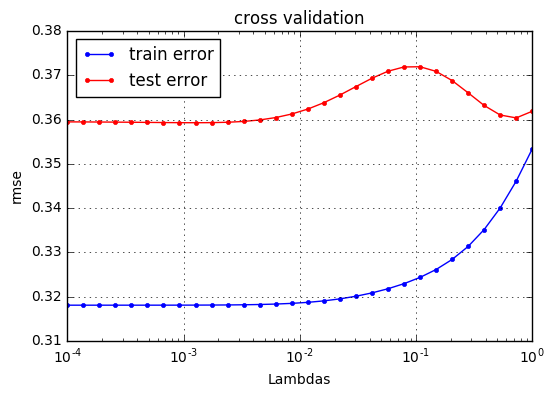

In [51]:
plt.semilogx(lambdas, losses_tr, marker=".", color='b', label='train error')
plt.semilogx(lambdas, losses_te, marker=".", color='r', label='test error')
plt.xlabel("Lambdas")
plt.ylabel("rmse")
plt.title("cross validation")
plt.legend(loc=2)
plt.grid(True)
plt.savefig("cross_validation")

=> Lambda : 10e-3

## Predict

In [52]:
DATA_TEST_PATH = '../data/test.csv'
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
print(tX_test.shape)

(568238, 30)


In [53]:
lambda_ = 0.001

tXTr = np.hstack((np.ones((tX_basis.shape[0],1)), tX_basis))
train_w, loss_tr = ridge_regression(y, tXTr, lambda_)

tXTe = normalize(tX_test)
tXTe = polynomialBasis(tXTe, 2)
tXTe = np.hstack((np.ones((tX_test.shape[0],1)), tXTe))



In [54]:
OUTPUT_PATH = '../output/out.csv'

y_pred = predict_labels(train_w, tXTe)

create_csv_submission(ids_test, y_pred, OUTPUT_PATH)